In [3]:
%autosave 0

Autosave disabled


# Why do crickets chirp at different rates?

## Using python to examine the Arrhenius energy of a biological process
Steve Singleton, inspired by *Laidler, J. Chem. Ed., 49, 1972, 343* [DOI: 10.1021/ed049p343](http://pubs.acs.org/doi/abs/10.1021/ed049p343) 

Biological processes typically involve complex sequences of chemical reactions. Rarely is it possible to model these processes precisely. In some cases, however, it is reasonable to model the system as a singlet-step reaction with a rate-determining step. Rate measurements can tell us if the process follows the [Arrhenius law](https://en.wikipedia.org/wiki/Arrhenius_equation). (Historical sidebar: Arrhenius, through [radiative forcing calculations](https://en.wikipedia.org/wiki/Svante_Arrhenius) in the late 1800's, predicted fossil fuel combustion could affect global climate.) 

In this exercise, the chirp rate of the snowy tree cricket *Oecanthus* at different temperatures is modeled using the [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation).

<img src="Snowytreecricket.JPG">

<center>https://en.wikipedia.org/wiki/Oecanthus_fultoni</center>

[Singing Crickets of North America](http://entnemdept.ufl.edu/walker/buzz/585a.htm) has sound recordings for crickets, katydids, and cicadas. Cricket songs recorded at different temperatures give a sense of what the researchers from the 1800s were hearing and measuring (something many of us are familiar with).

For example, the chirp rate at a relatively cool 12.5&deg;C: 

In [2]:
import IPython
IPython.display.Audio("585ssj.wav")

Compare this with the chirp rate at a warm 30.3&deg;C 

In [3]:
IPython.display.Audio("585slh.wav")

## Task:
Calculate the activation energy $E_a$ for cricket chirping using data from Bessey and Bessy, *Amer. Natur.*, **32**, 263, (1898).

Strategy:
Use linear regression and the Arrhenius equation to obtain the activation energy.

## Skills:
This exercise involves
- linearizing a function
- digitizing data from an image
- importing data using `pandas`
- plotting data with `matplotlib` and `seaborn`
- linear regression using `statsmodels.OLS` and `scipy.optimize`

## Concepts:
In this exercise you will apply concepts from
- data analysis (linear regression)
- thermochemistry (activation energy, Arrhenius equation)
- kinetics (rates, rate-determining step)

## Pre Questions

### 1) Compute the energy available to molecules at room temperature. Give your answer in kJ/mol.

### 2) Compared to the energy available at room temperature, how much energy is required for a typical biological process? (Explain your reasoning)

<pre>
 a) less
 b) about the same
 c) more
 d) much more
 e) I have no idea at the moment
</pre>

### 3) Sketch a qualitative plot showing the energy profile of the one-step reaction $A \rightarrow B$. Identify and describe key features of the plot.
(python script used to generate [plot axes](rxn_profile_axes.py))

<img src='rxn_profile_axes.png'>

### 4) By how much will a typical reaction rate change if the temperature increases by 10°C? Explain your reasoning.

The reaction rate will
<pre>
a) decrease
b) stay the same
c) increase by about 10%
d) increase by about 100% (double)
e) more than double
f) don't know at this time
</pre>

## The Data
Plot reproduced from [Bessey & Bessey, Am. Natur., 376, 1898, 263](http://www.jstor.org/stable/2452666).
<img src="chirp_temp.jpg" width="800" height="600">

To extract the chirp/temp data pairs from the Bessey & Bessey article, I copied and cropped a picture of the plot using [gimp](www.gimp.org) (though any image software could be used), exported it as a jpeg file, and used the online service [WebPlotDigitizer](http://arohatgi.info/WebPlotDigitizer/app/). The data were saved to a comma separated values (CSV) file, and imported into a [pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) (this is shown below). Temperature and chirp rates were converted to use the log form of the [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation):

$$\begin{align}
\ln k &= \frac{-E_a}{R} \frac{1}{T} + \ln(A)\\
y &=\ \ m\  \ \ x +  b
\end{align}
$$

In this analysis, the Arrhenius equation is linearized and the activation energy is determined using linear regression.

### CTQ: Describe a method by which the activation energy can be obtained from the Arrhenius equation if the chirp rate and temperature are known.

### CTQ: If the temperature is increased, will an endothermic reaction speed up or slow down? Explain your reasoning.

### CTQ: Sketch a qualitative plot of the Arrhenius equation for an endothermic reaction. Describe the key features and general behavior of the curve.

## The Analysis
There are many regression libraries and functions in the python ecosystem, probably because regression is such a common task. The two libraries shown here, `statsmodels.OLS` and `scipy.optimize` were chosen because many examples for their use exist. Use caution when pasting code snippets if you're unsure what they do. Experiment with and read about the tool until you learn how it works.

### How it's done

In [1]:
# import common analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn  # prettier plot defaults, residual plots

# show graphics in the notebook
%matplotlib inline

# default figure (plot) size
plt.rcParams['figure.figsize'] = (8.0, 6.0)

/home/ssinglet/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


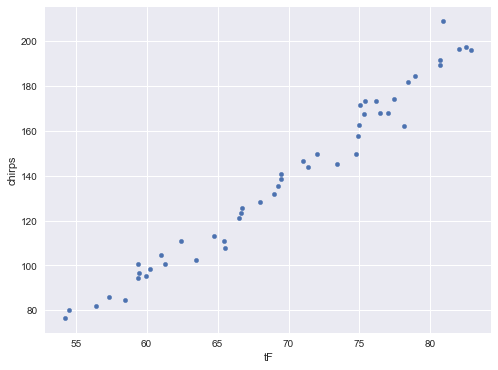

In [2]:
# Steps: import data from csv file, convert units, plot
df = pd.read_csv('cricket.csv', skiprows=1, names=['tF', 'chirps'])

df['T_inv']= 1/((df.tF + 459.67) * 5/9)
df['ln_chirps'] = np.log(df.chirps)

df.plot(x='tF', y='chirps', kind='scatter')

### Fit the data using `statsmodels.ols`
`statsmodels.ols` incorporates a [formula interface](http://patsy.readthedocs.org/en/latest/formulas.html) similar to Rstats. The relationship we seek is "ln_chirps" on the left-hand side, and "tK_1" on the right-hand side. The output provides an impressive amount of information that may be useful in other statistical analysis problems. For now, look for the numbers that will answer the question.

In [5]:
# the "formula" api
import statsmodels.formula.api as smf

fit = smf.ols(formula="ln_chirps ~ T_inv", data=df).fit()

# print() suppresses html output; remove if you want html output
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_chirps   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2185.
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           2.00e-40
Time:                        09:08:00   Log-Likelihood:                 86.152
No. Observations:                  48   AIC:                            -168.3
Df Residuals:                      46   BIC:                            -164.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     22.6872      0.381     59.590      0.0

### Extract the fit parameters
We are interested in the fit coefficients from the OLS analysis. No need to copy them by hand as they're object attributes.

In [6]:
fit.params
## or individually as fit.params.Intercept and fit.params.tK_1

Intercept      22.687162
T_inv       -5230.569664
dtype: float64

### Does the fit agree with the data?
Often called "$\chi$ by eye", we can overlay the fit line with the data and check the agreement. This is shown using two common python libraries, `matplotlib` and `seaborn`.

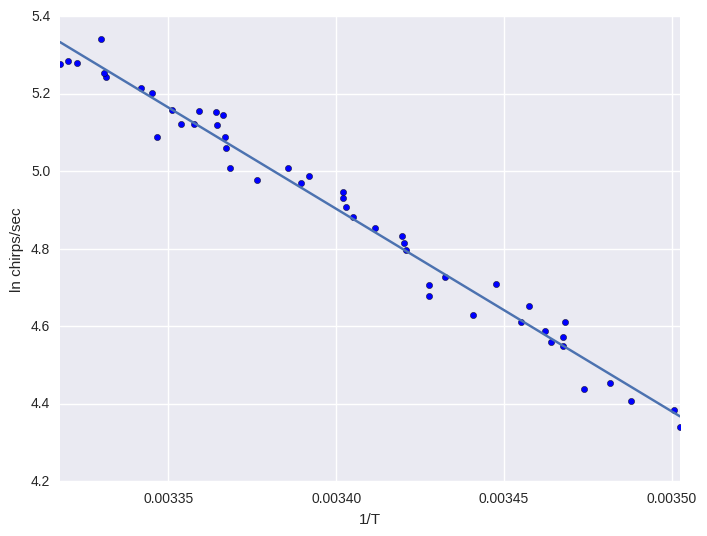

In [7]:
# matplotlib
plt.scatter(df.T_inv, df.ln_chirps)
plt.plot(df.T_inv, fit.fittedvalues)
plt.xlim(df.T_inv.min(), df.T_inv.max())
plt.xlabel('1/T')
plt.ylabel('ln chirps/sec')

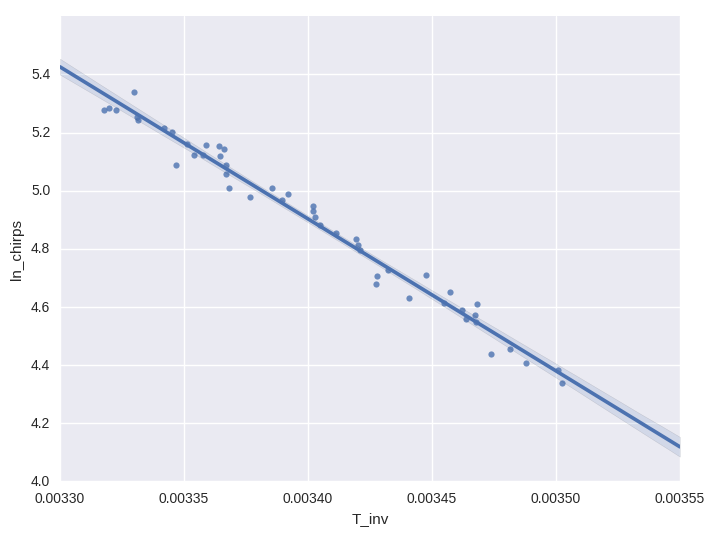

In [8]:
# seaborn's regression plot shows 95% probability band
sn.regplot(x = "T_inv", y = "ln_chirps", data = df)

### Plotting the residuals
Checking the residuals of the fit might expose systematic errors in the model. A python function could be defined to calculate the residuals, but the `seaborn` package has tools for this purpose.

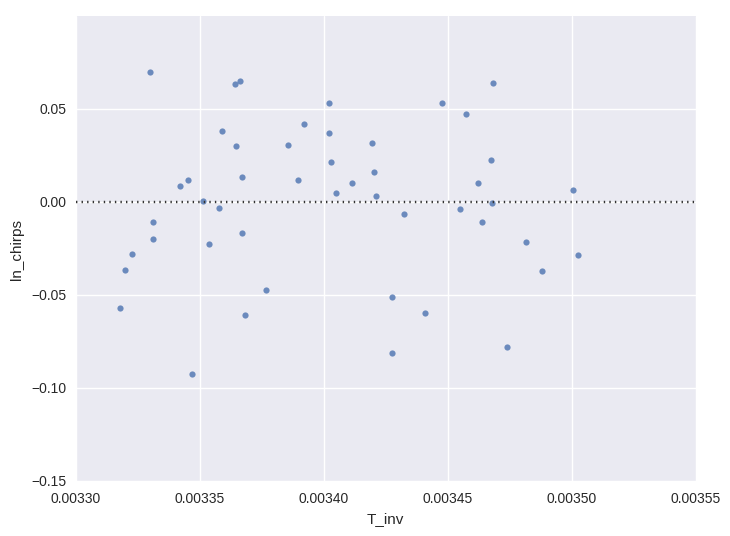

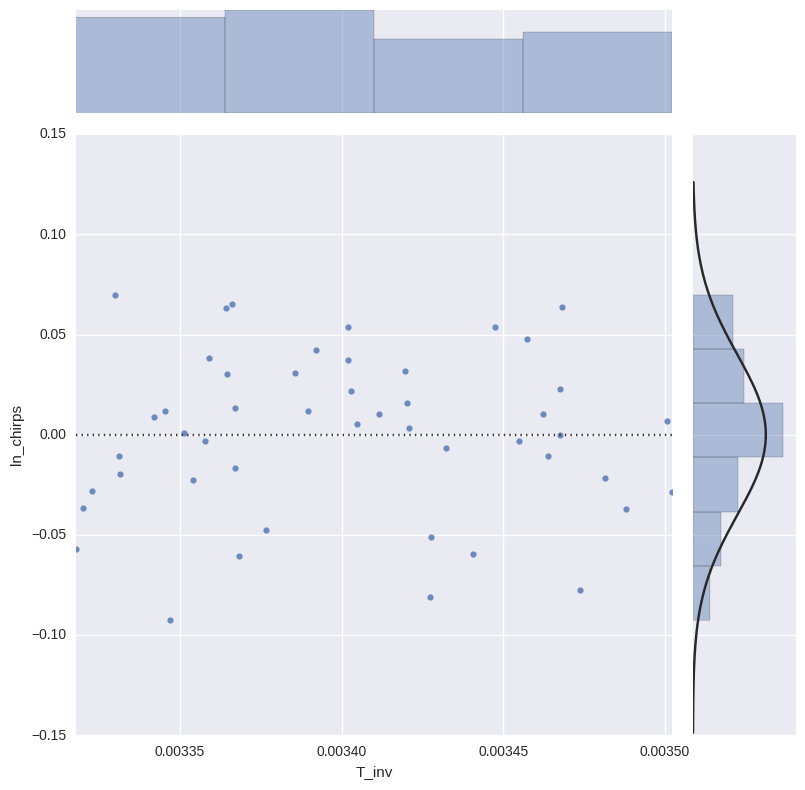

In [9]:
sn.residplot('T_inv', 'ln_chirps', df)
sn.jointplot('T_inv', 'ln_chirps', df, kind='resid', 
                xlim=(df.T_inv.min(), df.T_inv.max()), size=8)

### CTQ: Does the uncertainty in the fit appear to be random or systematic? Explain your reasoning.

### What is $E_a$?
Now compute $E_a$ from the slope (recall $m = -E_a/R$). `scipy` knows the gas constant R, so it doesn't have to be entered manually (but certainly could be). Pay attention to units.

In [10]:
from scipy.constants import gas_constant as R

Ea = -R * fit.params.T_inv/1000
Ea

43.489361199003653

### CTQ: Does the result make sense?
The activation energy for chirping looks to be about $E_a$ = 40 kJ/mol. Does this seem like a reasonable number? Consider both the sign and magnitude of your answer.

## Another approach: scipy.optimize
`scipy.optimize.curve_fit` is another fitting library available in scipy. This allows an arbitrary model function to be defined. Here, a line (y = mx + b) is used and should give a similar result to the `ols` fit above.

In [11]:
from scipy.optimize import curve_fit

def model(x, m, b):
    return m*x + b

popt, pcov = curve_fit(model, df.T_inv, df.ln_chirps)

A little work is needed to extract the optimized parameters and error information. `pcov` is the covariance matrix; the standard errors are the square roots of the diagonal elements (see scipy docs).

In [12]:
perr = np.sqrt(np.diag(pcov))
popt, pcov, perr

(array([-5230.56967206,    22.68716169]),
 array([[  1.25210043e+04,  -4.25965829e+01],
        [ -4.25965829e+01,   1.44949143e-01]]),
 array([ 111.89729355,    0.38072187]))

In [13]:
print("Ea = (%.1f +/- %.1f) KJ" % (popt[0]*-R/1000, perr[1]))

Ea = (43.5 +/- 0.4) KJ


The fits agree.

Now it's time to *critique the analysis*. Is this a reasonable approach for measuring the activation energy of this process? What errors and assumptions should be acknowledged? Over what range is the result valid? What are the limits of the model?

### CTQ: How should the "final answer" be reported so that it communicates the result and the uncertainty in that result?

## Summing up...
The opening focus question was "Why do crickets chirp at different rates?". Write a 250-500 word response to this question. In the summary, include the concepts listed and the strategy used to answer the focus question.

## Extension Exercises
1. Validate or refute the rule-of-thumb, "the Fahrenheit temperature is given by counting the number of chirps in 15 seconds and adding 40."

1. The Bessey and Bessey article proposes the empirical relationship
$$ T = 60 + \frac{N - 92}{4.7} $$ with T in Farenheit, and N is chirps/min. Plot this curve with the data points and judge the quality of the fit. The authors claim $\pm$2&deg;F in the range of 60--80 degrees; do you agree?

2. Use a python fitting routine to determine the undertainty in the empirical fit equation.

3. Read the last two paragraphs of the article and comment on the authors' critique of their analysis. Can you think of reasons for the deviations from linearity that they call attention to?

1. Listen to several wav files from the Singing Crickets website. Using a timer (or the player), count the chirps to obtain the chirp frequencies at different temperatures. Compare these data to that of Bessey & Bessey. Also, use these values to validate the chemist's rule of thumb, "a rate doubles with a 10&degC; increase in temperature".

2. Take the FFT (fast Fourier transform) of the wav files to obtain the chirping frequency and compare to measuring by ear (see `scipy.fftpack`, `scipy.io.wav`, and the open source [audacity](http://www.audacityteam.org/) for sound file analysis tools).

3. Look for high-frequency signals by "zooming in" on a single "chirp" in the sound file. Where do these come from? How do they compare to the frequencies that are audible to the human ear?

Please send comments or suggestions for improving this exercise. Original portions of this work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a> <br /> <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />

In [50]:
%autosave 0

Autosave disabled


In [51]:
from scipy.io.wavfile import read
freq1, snd1 = read('585slh.wav')
freq2, snd2 = read('585slo.wav')
freq1, freq2

(44100, 44100)

(0, 40000)

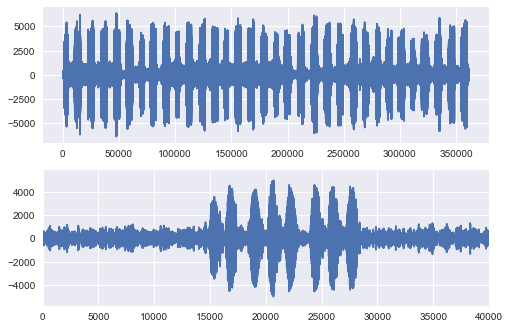

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn')
plt.subplot(211)
plt.plot(snd1)
plt.subplot(212)
plt.plot(snd2)
plt.xlim(0,40000)

(16000, 18000)

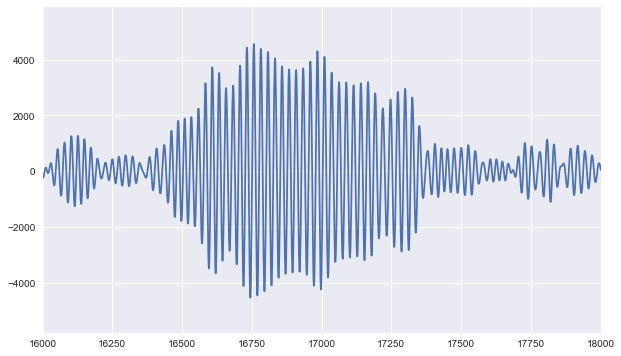

In [56]:
plt.figure(figsize=[10,6])
plt.plot(snd2)
plt.xlim(16000, 18000)

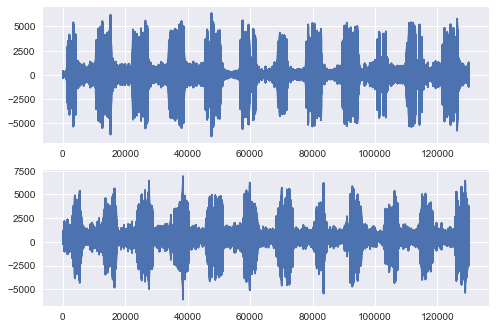

In [33]:
plt.subplot(211)
plt.plot(snd[:130000])
plt.subplot(212)
plt.plot(snd2[:130000])

# How good is Bessey & Bessey emperical fit equation?


from paper: $$T = 60 + \frac{N-92}{4.7}$$

rearranging,

N = ((T-60)*4.7)+92

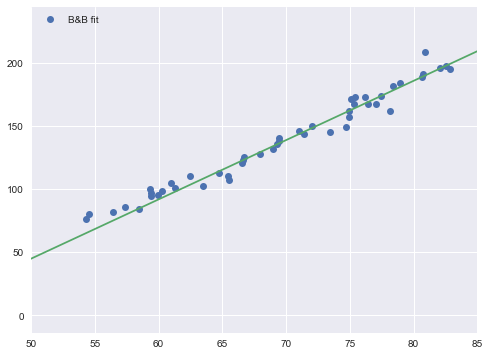

In [40]:
T = np.linspace(40, 90)
fit = lambda T: ((T-60)*4.7)+92

plt.plot(df.tF, df.chirps, 'o', label='B&B fit')
plt.plot(T, fit(T))
plt.xlim(50, 85)
plt.legend(loc='upper left')

Residuals

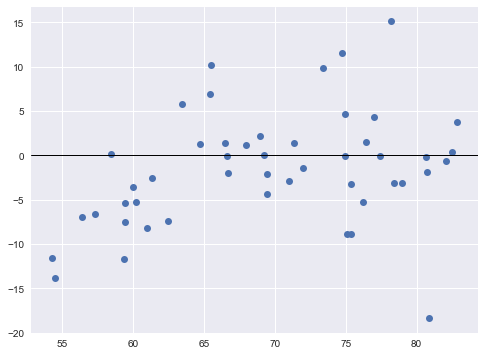

In [23]:
plt.plot(df.tF, fit(df.tF) - df.chirps, 'o')
plt.axhline(0, color='k', lw=1)

Systematic deviation. RSS: see https://en.wikipedia.org/wiki/Residual_sum_of_squares

In [36]:
np.array((fit(df.tF) - df.chirps)**2).sum()

2109.635421112901

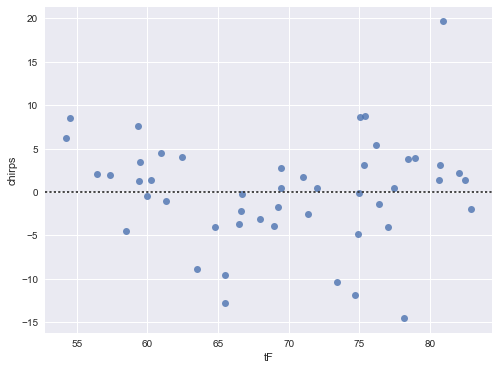

In [26]:
import seaborn as sns
sns.residplot('tF', 'chirps', data=df)

Hmm, looks like seaborn came up with a different (better?) fit.